In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = pd.read_csv("17-04-2021-results.csv")

In [3]:
data =  data[(data.n>10000) & (data.opt!=3)]

In [49]:
data

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
3,3,99,87,0.100,256,4,True,0.00100,100000,1
4,4,99,88,0.100,256,4,True,0.00100,100000,2
9,9,99,80,0.100,256,4,True,0.01000,100000,1
10,10,99,84,0.100,256,4,True,0.01000,100000,2
15,15,98,76,0.100,256,4,True,0.00010,100000,1
16,16,99,73,0.100,256,4,True,0.00010,100000,2
21,21,99,83,0.100,256,4,True,0.00001,100000,1
22,22,99,84,0.100,256,4,True,0.00001,100000,2
27,27,98,72,0.100,256,4,False,0.00100,100000,1
28,28,99,84,0.100,256,4,False,0.00100,100000,2


48
48


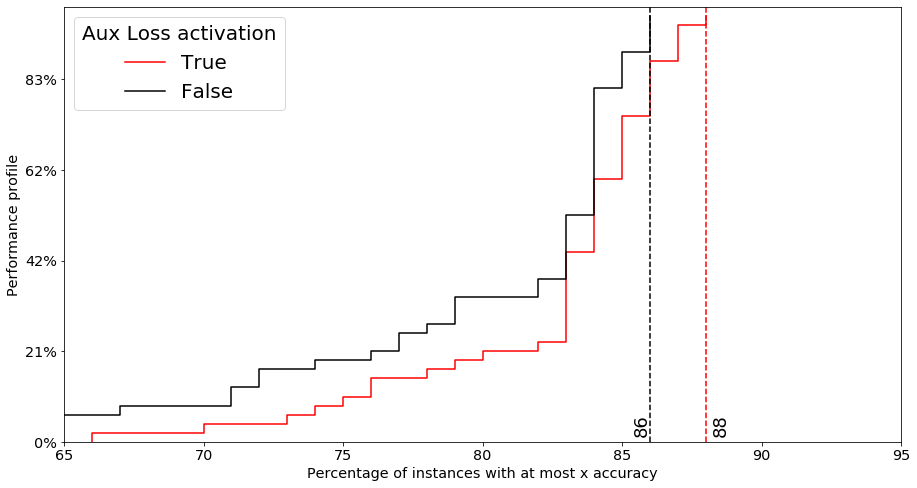

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


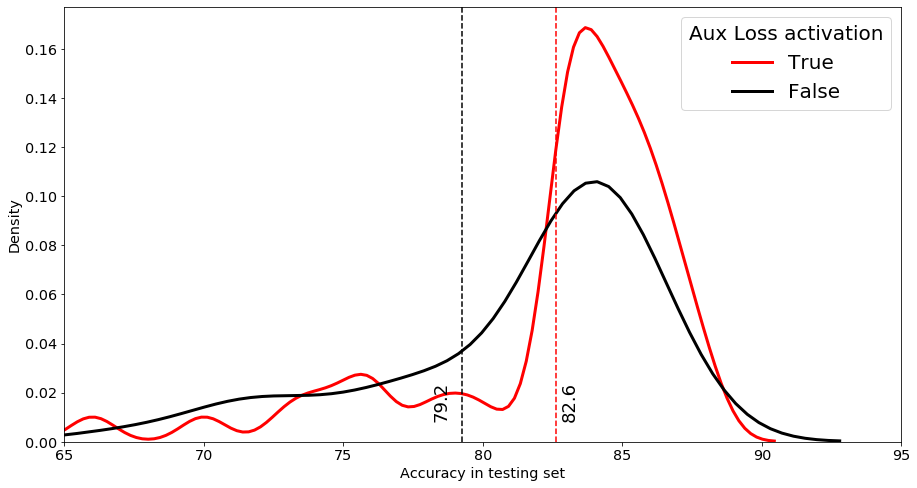

In [50]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,8))
losses = [True, False]

colors = ['red', 'black']
# Iterate through the five airlines
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]['acc_test']
    #data = np.random.randn(1000)
    print(subset.shape[0])
    sorted_data = np.sort(subset)  # Or data.sort(), if data can be modified

    # Cumulative counts:
    plt.step(sorted_data, np.arange(sorted_data.size), color=colors[i], label=loss)  # From 0 to the number of data points-1
    #plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

    #plt.show()
    i=i+1
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=subset.shape[0]))
plt.xlabel('Percentage of instances with at most x accuracy')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20, loc='upper left')

plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].max(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].max(), ymin=0, ymax=1, color='black', linestyle='dashed')


max1 = np.round(data[data.aux_loss_activated==True]['acc_test'].max(),1)
max2 = np.round(data[data.aux_loss_activated==False]['acc_test'].max(),1)
plt.text(max1+0.2, 1,str(max1),rotation=90, fontsize=18)
plt.text(max2-0.6, 1,str(max2),rotation=90, fontsize=18)


plt.ylabel('Performance profile')
plt.xlim(65,95)
plt.ylim(0,subset.shape[0])
plt.show()



plt.figure(figsize=(15,8))

i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(65,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )
plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].mean(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].mean(), ymin=0, ymax=1, color='black', linestyle='dashed')

mean1 = np.round(data[data.aux_loss_activated==True]['acc_test'].mean(),1)
mean2 = np.round(data[data.aux_loss_activated==False]['acc_test'].mean(),1)
plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


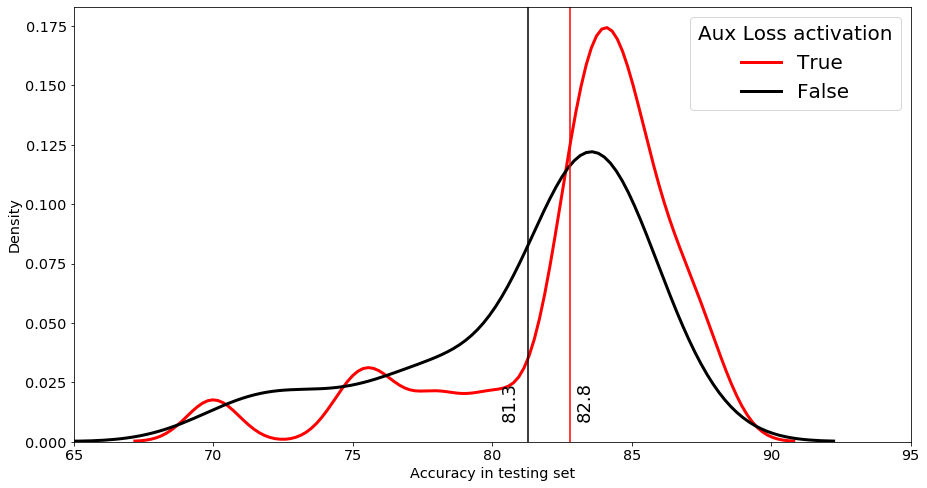

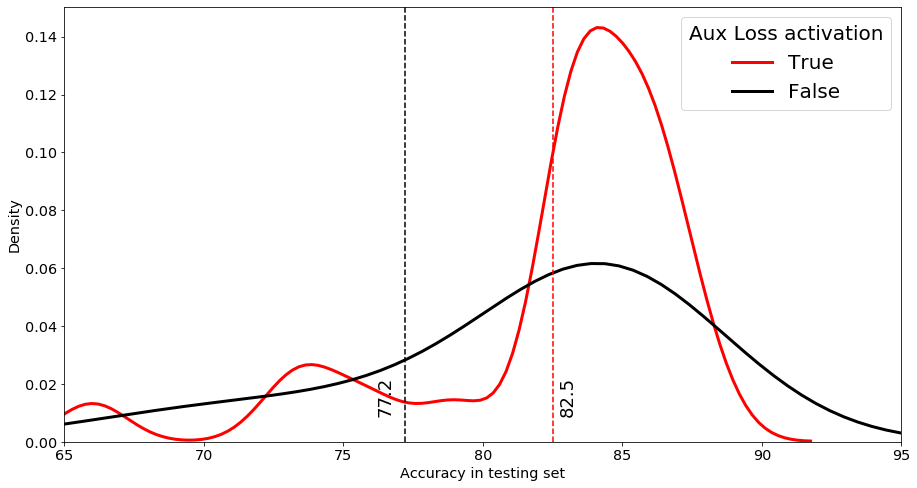

In [30]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,8))
losses = [True, False]

colors = ['red', 'black']
opt = 1
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[(data['aux_loss_activated'] == loss) & (data['opt'] == opt) ]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(65,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )
mean1 = np.round(data[(data.aux_loss_activated==True) & (data['opt'] == opt)]['acc_test'].mean(),1)
mean2 = np.round(data[(data.aux_loss_activated==False) & (data['opt'] == opt)]['acc_test'].mean(),1)
plt.axvline(x=mean1, ymin=0., ymax=1, color='red')
plt.axvline(x=mean2, ymin=0, ymax=1, color='black')

plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()


fig, ax = plt.subplots(figsize=(15,8))
opt = 2
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[(data['aux_loss_activated'] == loss) & (data['opt'] == opt) ]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(65,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )


mean1 = np.round(data[(data.aux_loss_activated==True) & (data['opt'] == opt)]['acc_test'].mean(),1)
mean2 = np.round(data[(data.aux_loss_activated==False) & (data['opt'] == opt)]['acc_test'].mean(),1)

plt.axvline(x=mean1, ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=mean2, ymin=0, ymax=1, color='black', linestyle='dashed')

plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()

In [6]:
data[(data.aux_loss_activated==True)].mean()

Unnamed: 0               132.500000
acc_train                 98.916667
acc_test                  82.625000
epsilon                    0.058333
batch_size               384.000000
hidden_size                4.000000
aux_loss_activated         1.000000
EPS1                       0.002778
n                     100000.000000
opt                        1.500000
dtype: float64

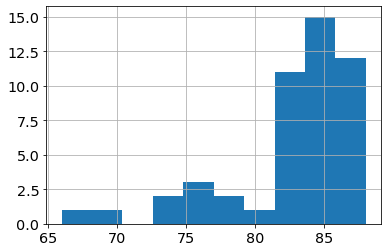

In [7]:
data_aux = data[(data.aux_loss_activated==True)]

data_aux.acc_test.hist()

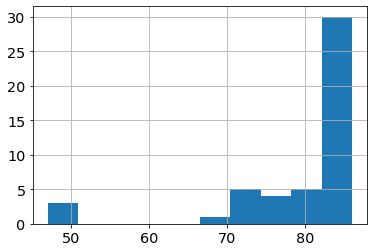

In [8]:
data_non_aux = data[(data.aux_loss_activated==False)]
data_non_aux.acc_test.hist()

In [9]:
data_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
147,147,99,88,0.050,512,4,True,0.00100,100000,1
4,4,99,88,0.100,256,4,True,0.00100,100000,2
99,99,99,87,0.050,256,4,True,0.00100,100000,1
196,196,99,87,0.025,256,4,True,0.00100,100000,2
100,100,99,87,0.050,256,4,True,0.00100,100000,2
3,3,99,87,0.100,256,4,True,0.00100,100000,1
202,202,99,86,0.025,256,4,True,0.01000,100000,2
51,51,99,86,0.100,512,4,True,0.00100,100000,1
256,256,99,86,0.025,512,4,True,0.00010,100000,2
255,255,99,86,0.025,512,4,True,0.00010,100000,1


In [10]:
data_non_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
171,171,99,86,0.050,512,4,False,0.00100,100000,1
136,136,99,86,0.050,256,4,False,0.00010,100000,2
219,219,99,86,0.025,256,4,False,0.00100,100000,1
190,190,99,86,0.050,512,4,False,0.00001,100000,2
178,178,99,86,0.050,512,4,False,0.01000,100000,2
34,34,99,85,0.100,256,4,False,0.01000,100000,2
184,184,99,85,0.050,512,4,False,0.00010,100000,2
94,94,99,85,0.100,512,4,False,0.00001,100000,2
280,280,99,85,0.025,512,4,False,0.00010,100000,2
93,93,99,84,0.100,512,4,False,0.00001,100000,1


In [11]:
data_aux = data[(data.aux_loss_activated==True) & (data.batch_size>64) & (data.n>10000)]

In [12]:
data_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
147,147,99,88,0.050,512,4,True,0.00100,100000,1
4,4,99,88,0.100,256,4,True,0.00100,100000,2
99,99,99,87,0.050,256,4,True,0.00100,100000,1
196,196,99,87,0.025,256,4,True,0.00100,100000,2
100,100,99,87,0.050,256,4,True,0.00100,100000,2
3,3,99,87,0.100,256,4,True,0.00100,100000,1
202,202,99,86,0.025,256,4,True,0.01000,100000,2
51,51,99,86,0.100,512,4,True,0.00100,100000,1
256,256,99,86,0.025,512,4,True,0.00010,100000,2
255,255,99,86,0.025,512,4,True,0.00010,100000,1


In [13]:
data_non_aux = data[(data.aux_loss_activated==False) & (data.batch_size>64) & (data.n>10000)]
data_non_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
171,171,99,86,0.050,512,4,False,0.00100,100000,1
136,136,99,86,0.050,256,4,False,0.00010,100000,2
219,219,99,86,0.025,256,4,False,0.00100,100000,1
190,190,99,86,0.050,512,4,False,0.00001,100000,2
178,178,99,86,0.050,512,4,False,0.01000,100000,2
34,34,99,85,0.100,256,4,False,0.01000,100000,2
184,184,99,85,0.050,512,4,False,0.00010,100000,2
94,94,99,85,0.100,512,4,False,0.00001,100000,2
280,280,99,85,0.025,512,4,False,0.00010,100000,2
93,93,99,84,0.100,512,4,False,0.00001,100000,1


In [14]:
np.round(data_aux.acc_train.mean(),2), np.round(data_aux.acc_test.mean(),2)

(98.92, 82.62)

In [15]:
data_non_aux.acc_train.mean(), data_non_aux.acc_test.mean()

(98.47916666666667, 79.25)

In [16]:
data_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
3,3,99,87,0.1,256,4,True,0.0010,100000,1
4,4,99,88,0.1,256,4,True,0.0010,100000,2
9,9,99,80,0.1,256,4,True,0.0100,100000,1
10,10,99,84,0.1,256,4,True,0.0100,100000,2
15,15,98,76,0.1,256,4,True,0.0001,100000,1


In [17]:
data_non_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
27,27,98,72,0.1,256,4,False,0.0010,100000,1
28,28,99,84,0.1,256,4,False,0.0010,100000,2
33,33,99,79,0.1,256,4,False,0.0100,100000,1
34,34,99,85,0.1,256,4,False,0.0100,100000,2
39,39,99,77,0.1,256,4,False,0.0001,100000,1


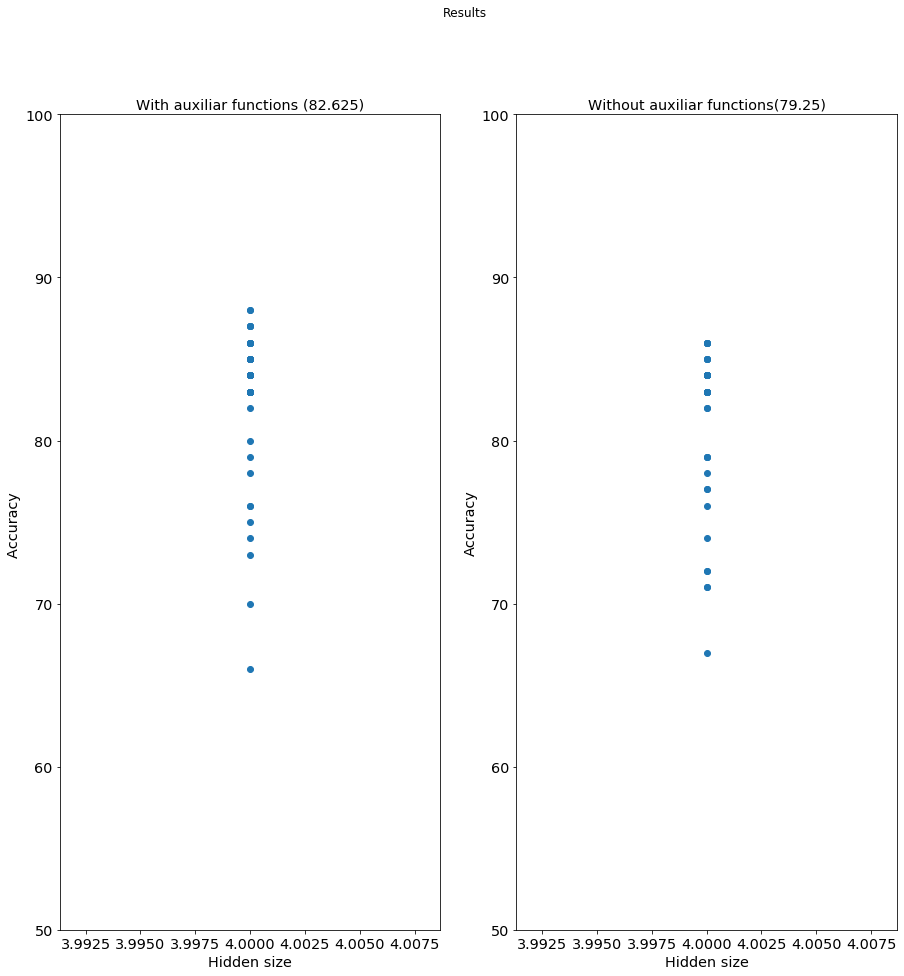

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.hidden_size, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.hidden_size, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('Hidden size')
ax2.set_xlabel('Hidden size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

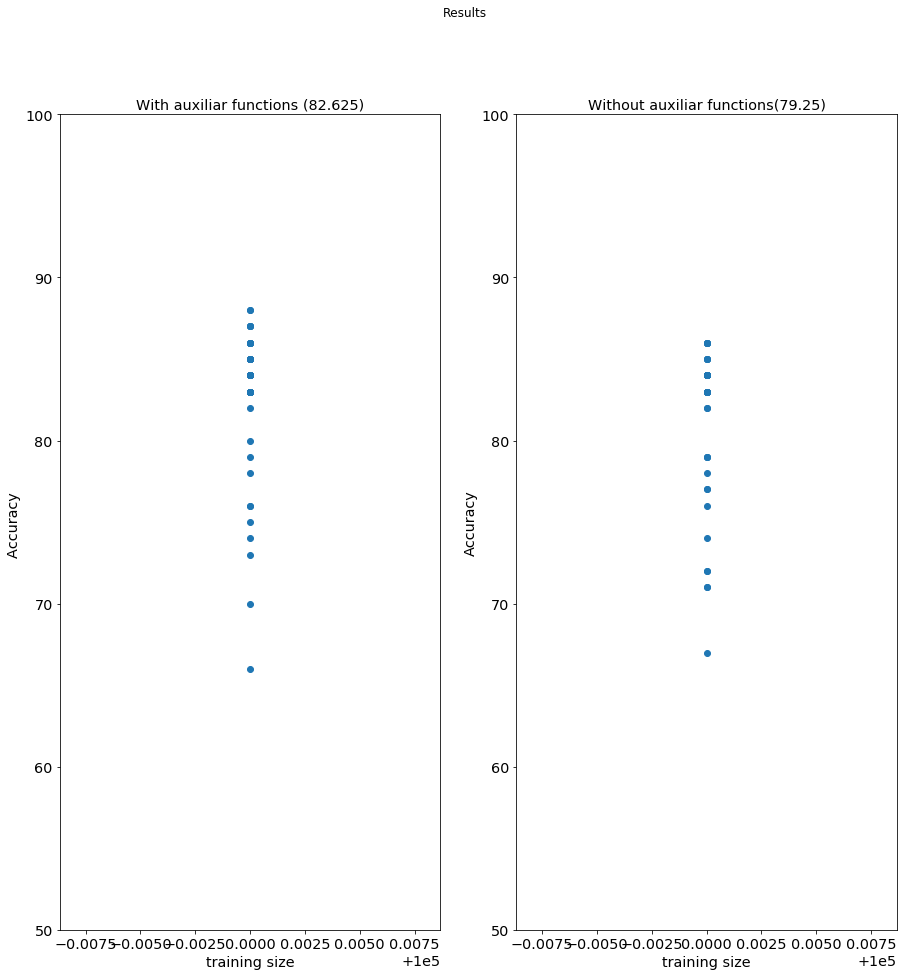

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.n, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.n, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

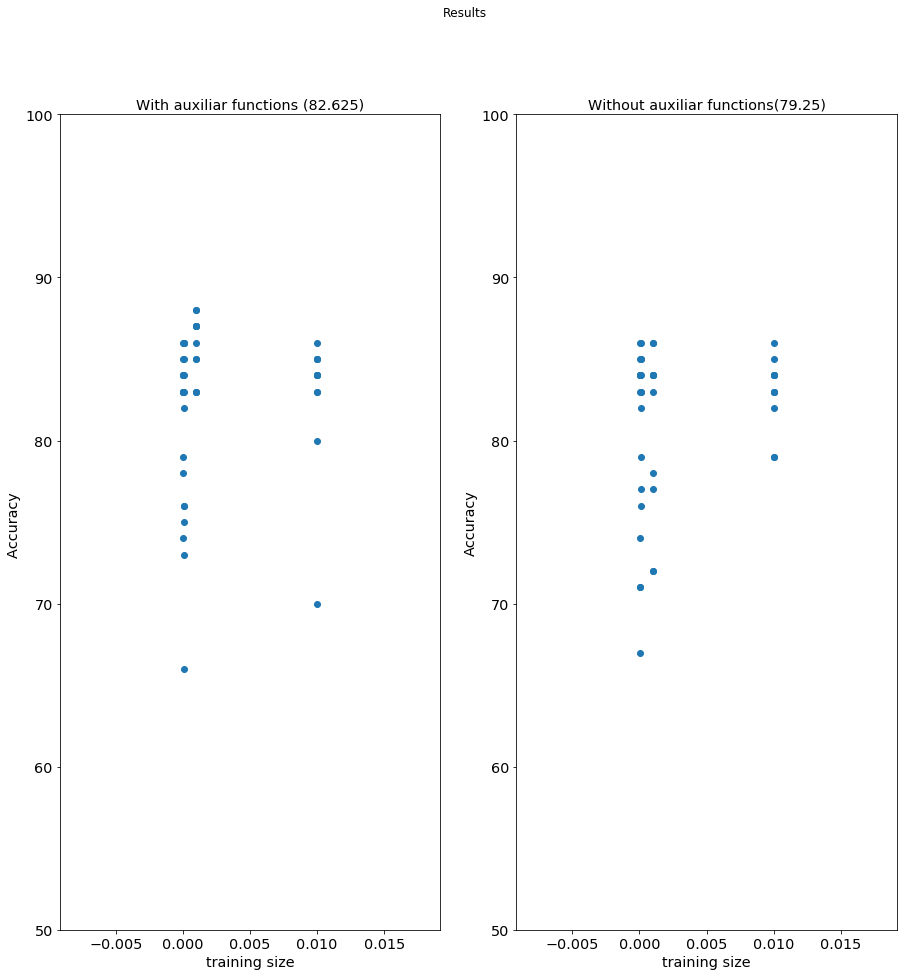

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.EPS1, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.EPS1, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

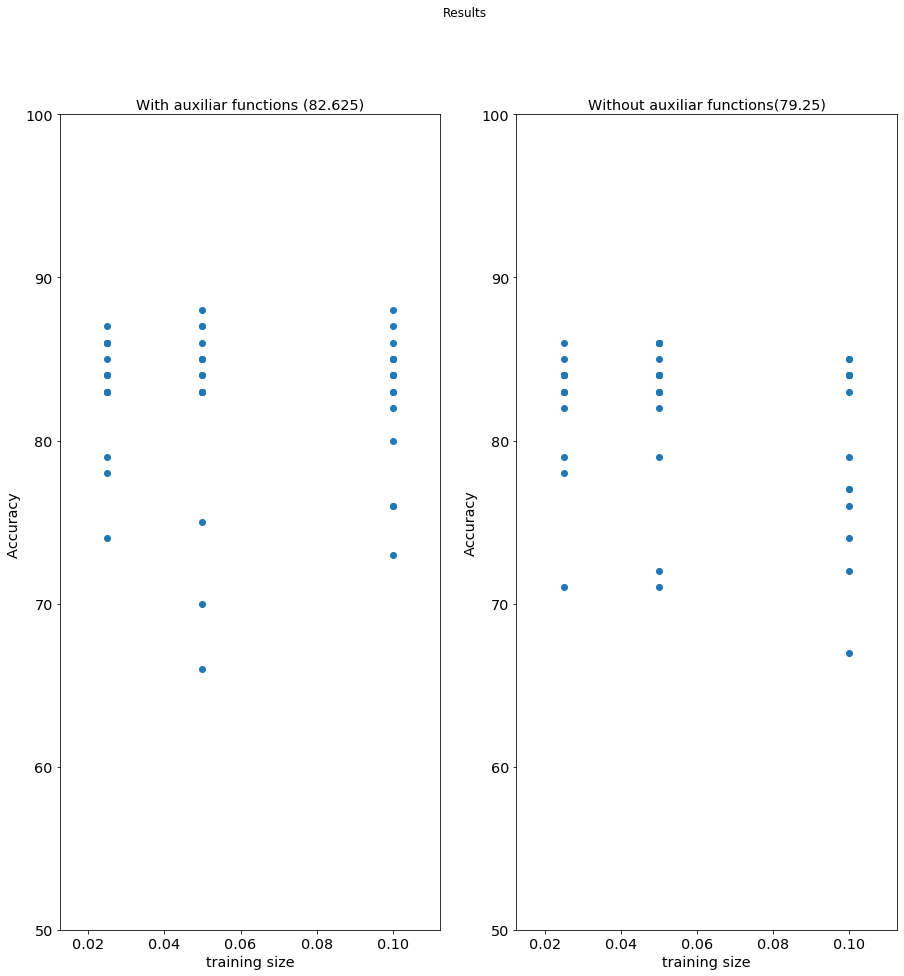

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [22]:
data_aux.epsilon.unique()

array([0.1  , 0.05 , 0.025])

In [23]:
data2 = pd.read_csv("06-04-2021-results.csv")

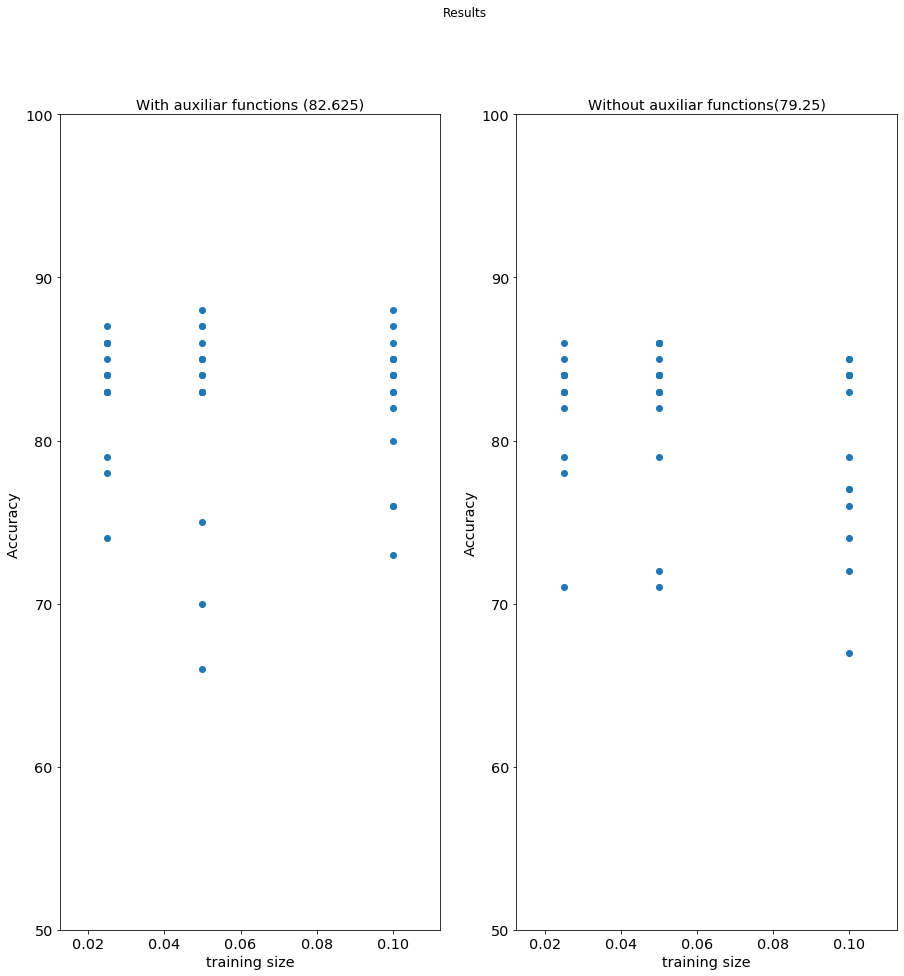

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()